#**Train YOLOv8 for Custom Instance Segmentation**


In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


##Install YOLOv8


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 12.3 MB/s eta 0:00:00


In [ ]:
import os
from IPython import display
display.clear_output()
#!yolo mode=checks

from ultralytics import YOLO

from IPython.display import display, Image

##Instance Segmentation

In [ ]:
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.4 source='/content/drive/MyDrive/ball2.png'

100% 88.1M/88.1M [00:00<00:00, 313MB/s]
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

image 1/1 /content/drive/MyDrive/ball2.png: 320x640 (no detections), 76.1ms
Speed: 10.6ms preprocess, 76.1ms inference, 77.0ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


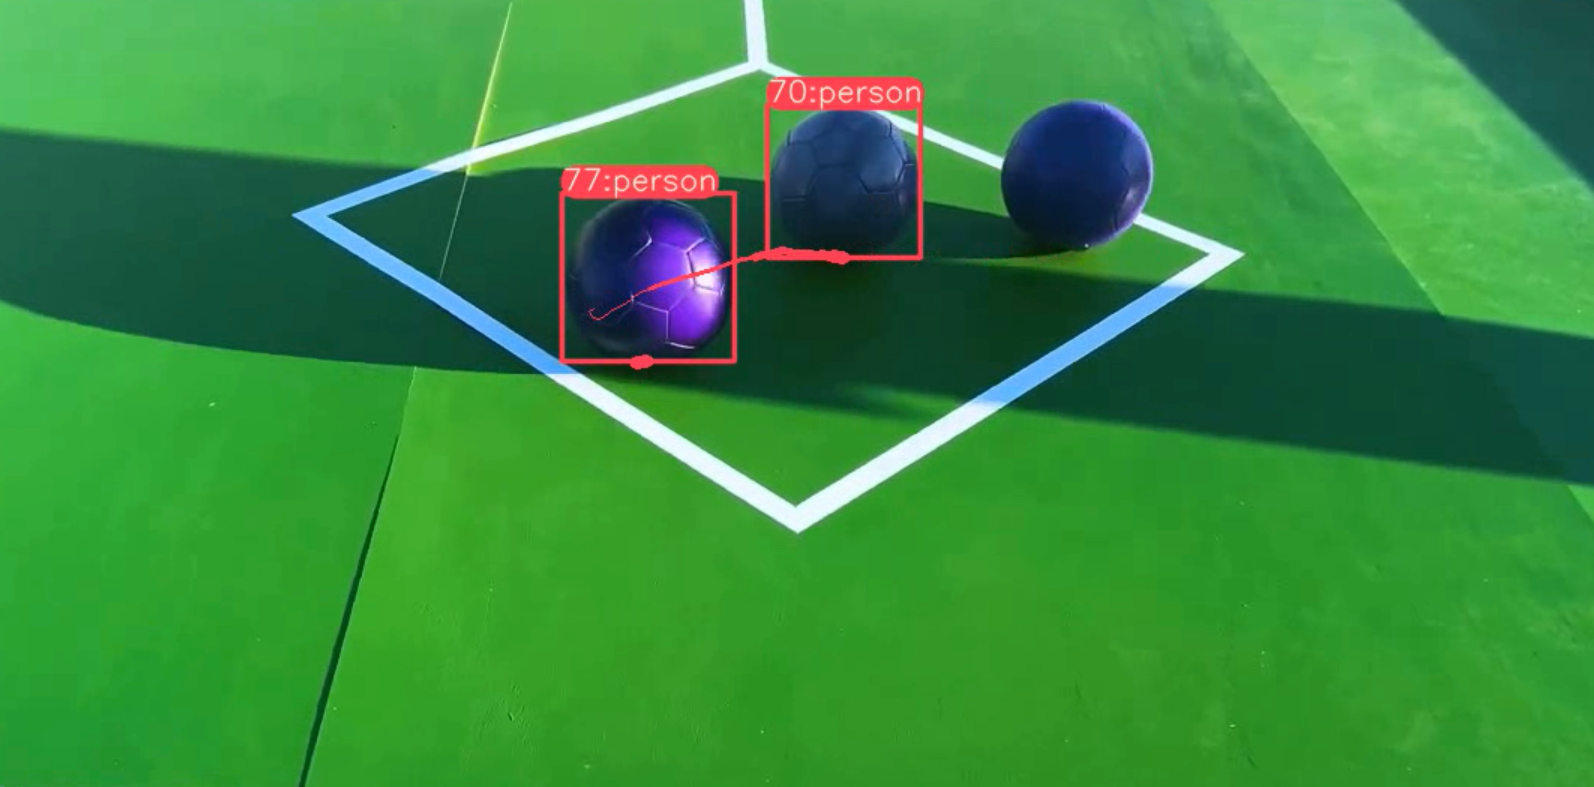

In [ ]:
Image(filename='/content/runs/segment/predict4/ball2.png', height=600)

##Import Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8IAdBThHBpznBgBV5Ucm")
project = rf.workspace("robocon-zvbcr").project("ball-column-segment")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Ball-Column-Segment-1 in yolov8:: 100%|██████████| 622/622 [00:00<00:00, 7688.26it/s]


##Train the YOLOv8 Model

In [ ]:
!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/Ball-Column-Segment-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [ ]:
Image(filename=f'/content/drive/MyDrive/ball.png', width=600)

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train3/weights/best.pt data={dataset.location}/data.yaml

##Predictions with Trained YOLOv8 Model on Custom Dataset

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train3/weights/best.pt conf=0.4 source=/content/Ball-Column-Segment-1/test/images/yt-Don5rBusXMU-0076_jpg.rf.0d123993d5c31b8e201fbe2241ad5549.jpg

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs

image 1/1 /content/Ball-Column-Segment-1/test/images/yt-Don5rBusXMU-0076_jpg.rf.0d123993d5c31b8e201fbe2241ad5549.jpg: 640x640 6 balls, 70.1ms
Speed: 3.1ms preprocess, 70.1ms inference, 708.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
from IPython.display import Image, display

from image_path in glob.glob(f'')[:5]
    display(Image(filename=image_path, height=600))
    print("\n")